In [15]:
!pip install missingno

In [5]:
#data analysis and wrangling
import pandas as pd 
import numpy as np


#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

#dates
import datetime
from matplotlib.dates import DateFormatter

#text analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdi
import re

#statistical analysis
from scipy.stats import ttest_ind

#warnings
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to /Users/julia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
cd = pd.read_csv("/Users/julia/Desktop/data science/forage/quantium/QVI_purchase_behaviour.csv")
td = pd.read_excel("/Users/julia/Desktop/data science/forage/quantium/QVI_transaction_data.xlsx")

# Transaction data

In [7]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
td.shape

(264836, 8)

In [9]:
td['TXN_ID'].nunique()

263127

In [10]:
#TXN_ID is not unique to each row. This is because there can be sales of chips with different brands in a single transaction (it less than transaction data row)
#look for duplicated 'TXN_ID' 
td[td.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [11]:
#lets take a look at 'TXN_ID' 48887
td.loc[td['TXN_ID'] == 48887, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,43605,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.60


In [12]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


<AxesSubplot:>

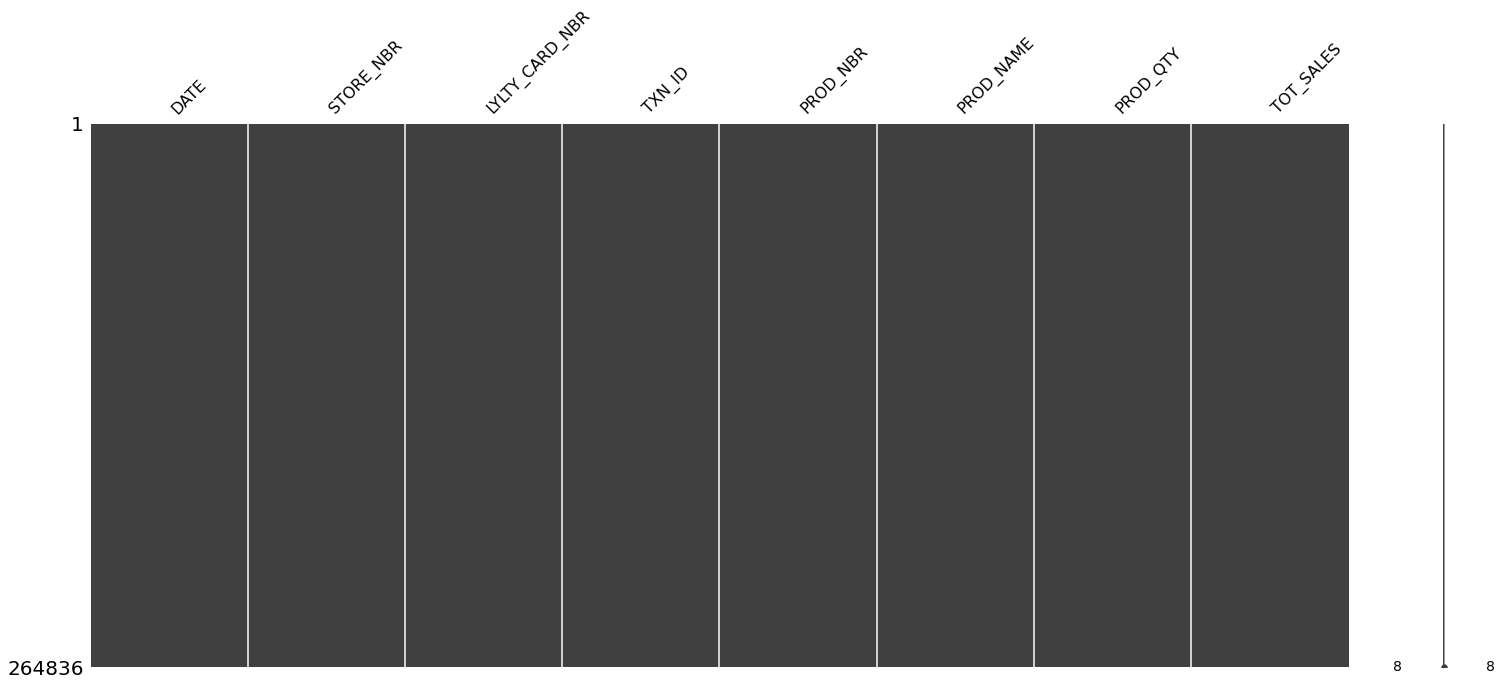

In [13]:
#plot graph of missing values for 'td''
missingno.matrix(td)

#based on the graph theres no missing numbers in td (no white line)

In [14]:
list(td.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [15]:
td['DATE'].head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

In [16]:
#date not in the right format
#convert excel integer into yyyy-mm-dd format
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [17]:
#apply function to 'DATE'feature in 'td' dataset
td['DATE'] = td['DATE'].apply(xlseriesdate_to_datetime)

In [18]:
#check new data format
td['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [19]:
td['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [20]:
#Extract weight out of "PROD_Name" and make Extract weight as a new column
td['PACK_SIZE'] = td['PROD_NAME'].str.extract("(\d+)")
td['PACK_SIZE'] = pd.to_numeric(td['PACK_SIZE'])
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [21]:
#'PROD_NAME' text cleaning
def clean_text(text):
    text = re.sub('[&/]', ' ', text) # remove special characters '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

# Apply text cleaning function to PROD_NAME column
td['PROD_NAME'] = td['PROD_NAME'].apply(clean_text)

In [22]:
td['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt 
1                    CCs Nacho Cheese     
2      Smiths Crinkle Cut  Chips Chicken  
3      Smiths Chip Thinly  S Cream Onion  
4    Kettle Tortilla ChpsHny Jlpno Chili  
Name: PROD_NAME, dtype: object

In [23]:
# Drop rows with salsa word in PROD_NAME (solution draft said the data has salsa word in it)


td[td["PROD_NAME"].str.contains("salsa")==False] 


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


In [24]:
# check for possible outliers
td["PROD_QTY"].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [25]:
#2 total sales with 200 chips products quantity looks odd
#explore further 
td.loc[td['PROD_QTY'] == 200, :] 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [26]:
#both the transaction with 200 chips products quantity have been made by the same person at the same store!
#Let's see all the transactions this person has made by tracking his loyalty card number

td.loc[td['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [27]:
#It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. 
#The customer might be buying chips for commercial purposes instead. We will remove this loyalty card number from further analysis.
# Filter out the customer based on the loyalty card number

td.drop(td.index[td['LYLTY_CARD_NBR'] == 226000], inplace = True)


In [28]:
# Re-examine transaction data to make sure it has been dropped 

td.loc[td['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE


In [29]:
# let's look if there are any obvious data issues such as missing data
td.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72636
TXN_ID            263125
PROD_NBR             114
PROD_NAME            114
PROD_QTY               5
TOT_SALES            111
PACK_SIZE             21
dtype: int64

In [30]:
# Now let's examine the number of transactions over time to see if there are any obvious data issues e.g. missing data

td.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72636
TXN_ID            263125
PROD_NBR             114
PROD_NAME            114
PROD_QTY               5
TOT_SALES            111
PACK_SIZE             21
dtype: int64

In [31]:
td = td.sort_values(by=['DATE'], inplace=False, ascending=False)


In [32]:
td

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
177004,2019-06-30,100,100099,98981,90,Tostitos Smoked Chipotle,2,8.8,175
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt Chlli Sr Cream Chips,2,7.6,110
264144,2019-06-30,242,242159,246222,36,Kettle Chilli,2,10.8,175
183724,2019-06-30,241,241082,245022,26,Pringles Sweet Spcy BBQ,2,7.4,134
261276,2019-06-30,113,113051,115705,49,Infuzions SourCream Herbs Veg Strws,2,7.6,110
...,...,...,...,...,...,...,...,...,...
203759,2018-07-01,269,269247,266543,98,NCC Sour Cream Garden Chives,2,6.0,175
230717,2018-07-01,57,57147,52098,81,Pringles Original Crisps,2,7.4,134
158471,2018-07-01,97,97014,96348,92,WW Crinkle Cut Chicken,2,3.4,175
103275,2018-07-01,56,56168,50909,7,Smiths Crinkle Original,2,11.4,330


In [33]:
#There's only 364 rows, meaning only 364 dates which indicates a missing date
#Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [34]:
# Create a new dataframe which contains the total sale for each date
a = pd.pivot_table(td, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9
...,...
2019-06-26,5305.0
2019-06-27,5202.8
2019-06-28,5299.6


In [35]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [36]:
c = a + b
c.fillna(0, inplace = True)
c

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9
...,...
2019-06-26,5305.0
2019-06-27,5202.8
2019-06-28,5299.6
2019-06-29,5497.6


In [37]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c 

,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9
...,...
2019-06-26,5305.0
2019-06-27,5202.8
2019-06-28,5299.6


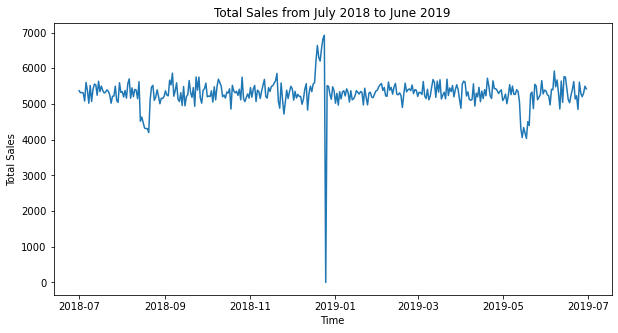

In [38]:
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [39]:
#We can see that sales spike up during the December month and zero sale on Christmas Day.
# Confirm the date where sales count equals to zero

c[c['Total Sales'] == 0]

,Total Sales
Date,
2018-12-25,0.0


In [40]:
# Let's zoom in at the December month only
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,Total Sales
Date,
2018-12-01,5427.6
2018-12-02,5108.2
2018-12-03,5353.3
2018-12-04,5167.3
2018-12-05,5268.0


Text(0.5, 1.0, 'Total Sales in December')

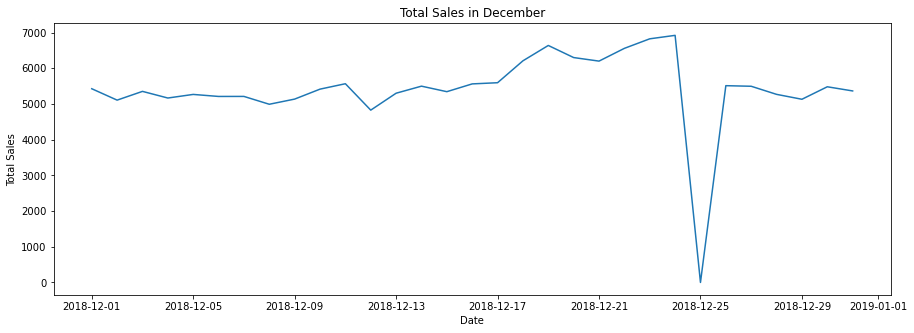

In [41]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

In [42]:
#Now that we are satisfied that the data no longer has outliers
#we can move on to creating other features such as brand of chips or pack size from PROD_NAME

td['PACK_SIZE'].unique()

array([175, 110, 134, 200,  90, 380, 150, 170, 300, 210, 330, 165, 160,
       270, 220, 190, 125,  70, 135, 250, 180])

<AxesSubplot:>

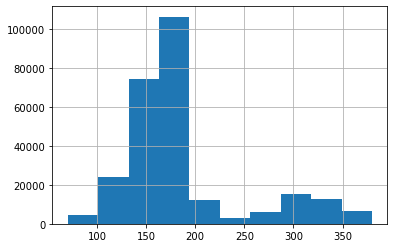

In [43]:
#The largest size is 380g and the smallest size is 70g - seems sensible!
## Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.
td['PACK_SIZE'].hist()

In [44]:
# create brands use the first word in PROD_NAME to work out the brand name
#create a new column under 'transaction data' dataset called 'Brand''
part = td['PROD_NAME'].str.partition()
td['BRAND'] = part[0]
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
177004,2019-06-30,100,100099,98981,90,Tostitos Smoked Chipotle,2,8.8,175,Tostitos
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt Chlli Sr Cream Chips,2,7.6,110,Cobs
264144,2019-06-30,242,242159,246222,36,Kettle Chilli,2,10.8,175,Kettle
183724,2019-06-30,241,241082,245022,26,Pringles Sweet Spcy BBQ,2,7.4,134,Pringles
261276,2019-06-30,113,113051,115705,49,Infuzions SourCream Herbs Veg Strws,2,7.6,110,Infuzions


In [45]:
td['BRAND'].unique()

array(['Tostitos', 'Cobs', 'Kettle', 'Pringles', 'Infuzions', 'Thins',
       'WW', 'Smiths', 'Snbts', 'Natural', 'Woolworths', 'Doritos',
       'Grain', 'Smith', 'RRD', 'CCs', 'Twisties', 'Burger', 'Cheezels',
       'Old', 'Tyrrells', 'NCC', 'French', 'Red', 'Infzns', 'Sunbites',
       'Dorito', 'Cheetos', 'GrnWves'], dtype=object)

In [46]:
## Clean brand names
td['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
td['BRAND'].replace('Ww', 'Woolworths', inplace = True)
td['BRAND'].replace('Ncc', 'Natural', inplace = True)
td['BRAND'].replace('Ccs', 'CCS', inplace = True)
td['BRAND'].replace('Smith', 'Smiths', inplace = True)
td['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
td['BRAND'].replace('Dorito', 'Doritos', inplace = True)
td['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
td['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

td['BRAND'].unique()

array(['Tostitos', 'Cobs', 'Kettle', 'Pringles', 'Infuzions', 'Thins',
       'WW', 'Smiths', 'Sunbites', 'Natural', 'Woolworths', 'Doritos',
       'Grainwaves', 'RRD', 'CCs', 'Twisties', 'Burger', 'Cheezels',
       'Old', 'Tyrrells', 'NCC', 'French', 'Red Rock Deli', 'Cheetos',
       'GrnWves'], dtype=object)

In [47]:
# Which brand had the most sales?
td.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           390239.8
Doritos          240590.9
Smiths           224660.2
Pringles         177655.5
Infuzions         99047.6
Old               90785.1
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
RRD               64954.5
Tyrrells          51647.4
Grainwaves        43048.8
Cheezels          40029.9
WW                35889.5
Natural           34272.0
Red Rock Deli     30091.5
CCs               18078.9
Cheetos           16884.5
Woolworths        13454.1
Sunbites           9676.4
GrnWves            8568.4
NCC                8046.0
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

# Customer  Data (cd)

In [48]:
cd

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


<AxesSubplot:>

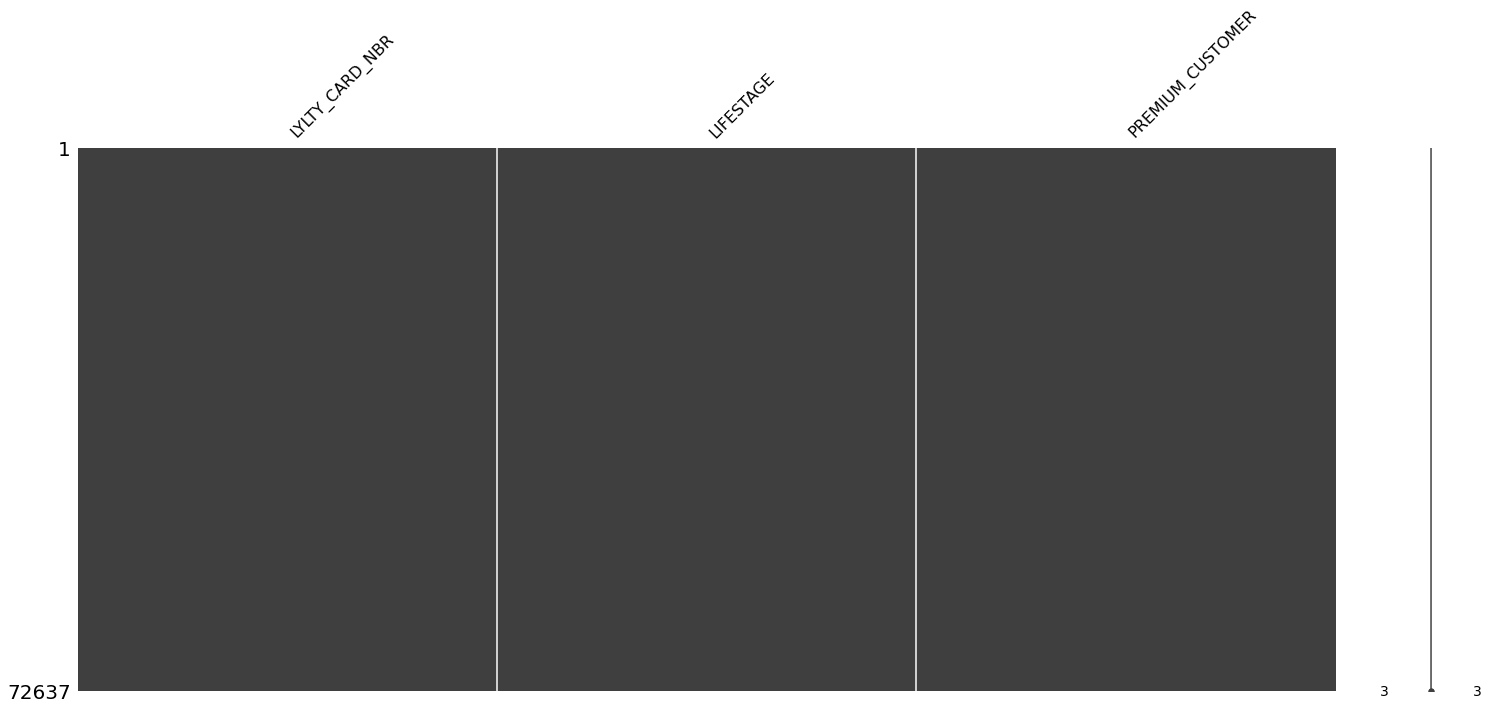

In [49]:
# Missing values in customerData

missingno.matrix(cd)

In [50]:
cd['LYLTY_CARD_NBR'].nunique()

72637

In [51]:
cd['LIFESTAGE'].nunique()

7

In [52]:
cd['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [53]:
cd['LIFESTAGE'].value_counts().sort_values(ascending=False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

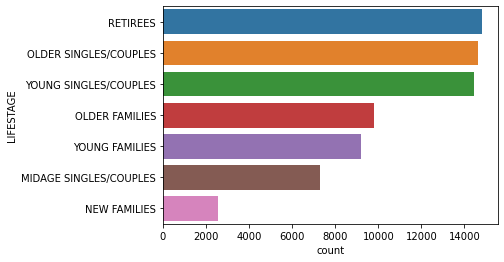

In [54]:
sns.countplot(y = cd['LIFESTAGE'], order = cd['LIFESTAGE'].value_counts().index)

In [55]:
# Value counts for each premium customer category

cd['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PREMIUM_CUSTOMER'>

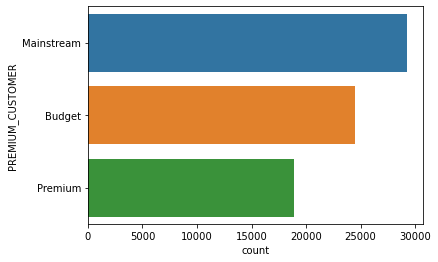

In [56]:
sns.countplot(y = cd['PREMIUM_CUSTOMER'], order = cd['PREMIUM_CUSTOMER'].value_counts().index)

# Merge transactiondata and customerdata together

In [57]:
combine_data = pd.merge(td, cd)

In [58]:
# Check for null values

combine_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [59]:
# Check for n/a values

combine_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [60]:
combine_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-06-30,100,100099,98981,90,Tostitos Smoked Chipotle,2,8.8,175,Tostitos,RETIREES,Premium
1,2019-05-25,100,100099,98980,103,RRD Steak Chimuchurri,2,5.4,150,RRD,RETIREES,Premium
2,2019-02-14,100,100099,98979,15,Twisties Cheese,2,9.2,270,Twisties,RETIREES,Premium
3,2018-08-23,100,100099,98978,94,Burger Rings,2,4.6,220,Burger,RETIREES,Premium
4,2018-07-09,100,100099,98977,112,Tyrrells Crisps Ched Chives,2,8.4,165,Tyrrells,RETIREES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2018-07-01,19,19316,16841,32,Kettle Sea Salt And Vinegar,2,10.8,175,Kettle,RETIREES,Budget
264830,2018-07-01,20,20196,17175,102,Kettle Mozzarella Basil Pesto,1,5.4,175,Kettle,YOUNG FAMILIES,Budget
264831,2018-07-01,20,20030,16975,90,Tostitos Smoked Chipotle,2,8.8,175,Tostitos,RETIREES,Premium
264832,2018-07-01,74,74003,72864,79,Smiths Chip Thinly CutSalt Vinegr,2,6.0,175,Smiths,YOUNG SINGLES/COUPLES,Premium


# Data analysis on customer segments 

Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

In [61]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE
sales = pd.DataFrame(combine_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns={'TOT_SALES':'Total Sales'},inplace=True)
sales.sort_values(by='Total Sales',ascending=False).head()

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                         
Budget           OLDER FAMILIES           168363.25
Mainstream       YOUNG SINGLES/COUPLES    157621.60
                 RETIREES                 155677.05
Budget           YOUNG FAMILIES           139345.85
                 OLDER SINGLES/COUPLES    136769.80

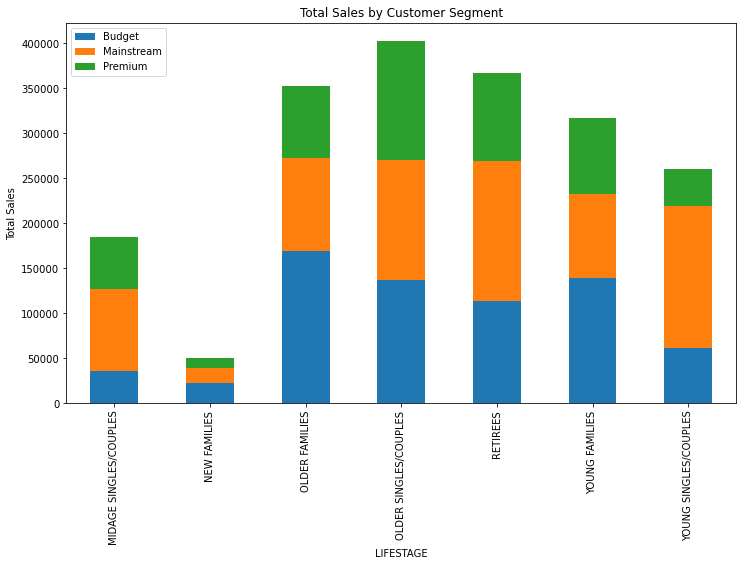

In [62]:
#visualize
salesPlot = pd.DataFrame(combine_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Top 3 sales come from budget older families, mainstream young singles/couples and mainstream retirees.

In [63]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE

customers = pd.DataFrame(combine_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head()

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750

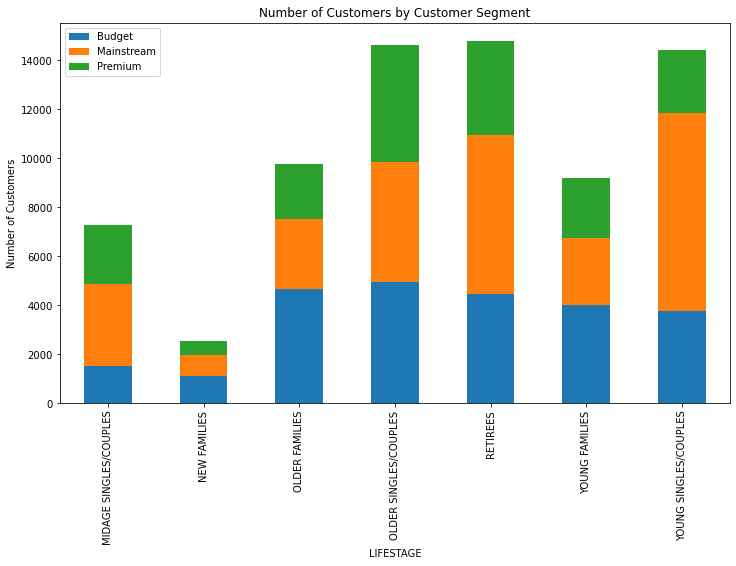

In [64]:
# Visualise

customersPlot = pd.DataFrame(combine_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

There are more mainstream young singles/couples and retirees. This contributes to more chips sales in these categories however this is not the major driver for the budget older families segment.

In [65]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = combine_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / combine_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.804309
Budget,OLDER FAMILIES,9.639572
Premium,OLDER FAMILIES,9.578091
Budget,YOUNG FAMILIES,9.238486
Premium,YOUNG FAMILIES,9.209207


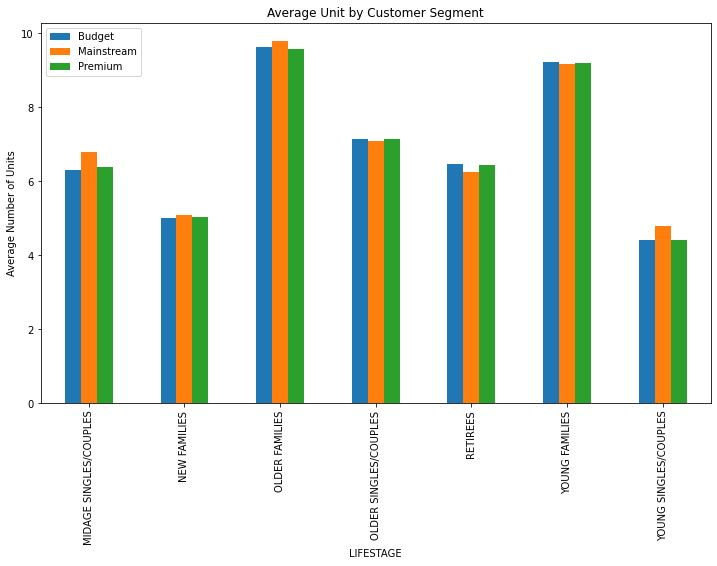

In [66]:
# Visualise 

avgUnitsPlot = pd.DataFrame(combine_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / combine_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Older families and young families buy more chips per customer

In [67]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE

avg_price = combine_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / combine_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.080079
                 MIDAGE SINGLES/COUPLES        4.000346
                 NEW FAMILIES                  3.939315
Budget           NEW FAMILIES                  3.936178
                 RETIREES                      3.933660

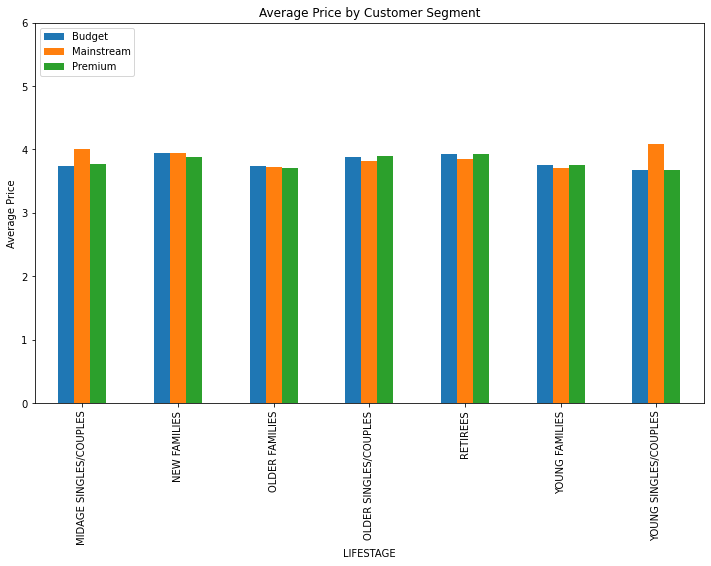

In [68]:
# Visualise 

avgPricePlot = pd.DataFrame(combine_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / combine_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

In [69]:
# Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples to test this difference

# Create a new dataframe pricePerUnit
pricePerUnit = combine_data

# Create a new column under pricePerUnit called PRICE
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

# Let's have a look
pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2019-06-30,100,100099,98981,90,Tostitos Smoked Chipotle,2,8.8,175,Tostitos,RETIREES,Premium,4.4
1,2019-05-25,100,100099,98980,103,RRD Steak Chimuchurri,2,5.4,150,RRD,RETIREES,Premium,2.7
2,2019-02-14,100,100099,98979,15,Twisties Cheese,2,9.2,270,Twisties,RETIREES,Premium,4.6
3,2018-08-23,100,100099,98978,94,Burger Rings,2,4.6,220,Burger,RETIREES,Premium,2.3
4,2018-07-09,100,100099,98977,112,Tyrrells Crisps Ched Chives,2,8.4,165,Tyrrells,RETIREES,Premium,4.2


In [70]:
# Let's group our data into mainstream and non-mainstream

mainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']


Text(0.5, 0, 'Price per Unit')

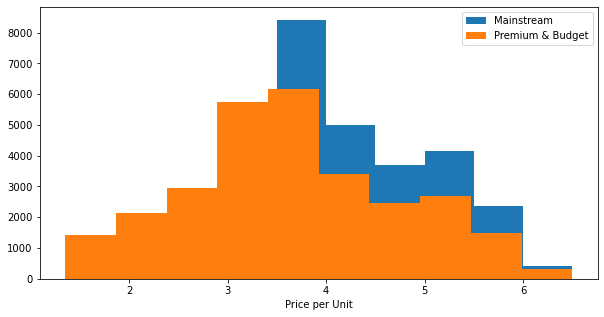

In [71]:
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [72]:
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(nonMainstream)))
if np.mean(mainstream) > np.mean(nonMainstream):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")

Mainstream average price per unit: $4.05
Non-mainstream average price per unit: $3.69
Mainstream customers have higher average price per unit. 


In [73]:
# Perform t-test 

ttest_ind(mainstream, nonMainstream)

Ttest_indResult(statistic=40.8341367879116, pvalue=0.0)

Mainstream customers have higher average price per unit than that of non-mainstream customers.

We have found quite a few interesting insights that we can dive deeper into. For example, we might want to target customers segments that contribute the most to sales to retain them to further increase sales. Let's examine mainstream young singles/couples against the rest of the cutomer segments to see if they prefer any particular brand of chips.

In [74]:
target = combine_data.loc[(combine_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (combine_data['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = combine_data.loc[(combine_data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (combine_data['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
22,2019-06-30,123,123154,126723,109,Pringles Barbeque,2,7.4,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7
23,2019-02-18,123,123154,126722,51,Doritos Mexicana,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Mainstream,4.4
24,2018-11-03,123,123154,126721,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Mainstream,3.9
115,2019-06-30,125,125122,128751,20,Doritos Cheese Supreme,2,11.4,330,Doritos,YOUNG SINGLES/COUPLES,Mainstream,5.7
116,2018-11-29,125,125122,128750,31,Infzns Crn Crnchers Tangy Gcamole,2,7.6,110,Infuzions,YOUNG SINGLES/COUPLES,Mainstream,3.8


# Affinity to brand


In [75]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [76]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002744,0.006094
CCs,0.010484,0.017191
Cheetos,0.007533,0.010960
Cheezels,0.016851,0.017619
Cobs,0.041856,0.035836


In [132]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False, inplace= True)
brand_proportions

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.029587,0.023968,1.234454
Twisties,0.043306,0.035355,1.224877
Kettle,0.185649,0.155243,1.195863
Tostitos,0.042581,0.035744,1.191269
Old,0.041598,0.034931,1.190850
Pringles,0.111980,0.094240,1.188241
Grainwaves,0.027309,0.023200,1.177104
Cobs,0.041856,0.035836,1.167987
Doritos,0.122877,0.105278,1.167174


Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.

# Affinity to pack size

In [79]:
# Target segment 
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())

In [80]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
PACK_SIZE,,
70,0.002847,0.005857
90,0.005954,0.011756
110,0.099658,0.083489
125,0.002821,0.005570
134,0.111980,0.094240


In [157]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False, inplace=True)
pack_proportions

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PACK_SIZE,,,
270,0.029846,0.023366,1.277295
380,0.030156,0.023964,1.258400
330,0.057465,0.047511,1.209522
110,0.099658,0.083489,1.193675
134,0.111980,0.094240,1.188241
210,0.027309,0.023200,1.177104
135,0.013849,0.012053,1.149001
250,0.013460,0.011989,1.122716
170,0.075740,0.074888,1.011386


It looks like mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes.

In [82]:
# Which brand offers 270g pack size?

combine_data.loc[combineData['PACK_SIZE'] == 270, :].head(10)

NameError: name 'combineData' is not defined

In [ ]:
# Is Twisties the only brand who sells 270g pack size?

combine_data.loc[combineData['PACK_SIZE'] == 270, 'BRAND'].unique()

Twisties is the only brand that offers 270g pack size.

# Conclusion


Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES)
We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments
(Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts
They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population

In [ ]:
combine_data.to_csv("/Users/julia/Desktop/data science/forage/quantium/task 1_combinedata.csv")